In [62]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import plotly.express as px
import pandas as pd
import numpy as np

In [63]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5n.pt')

Using cache found in /home/davide/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-8 Python-3.10.12 torch-2.2.1+cpu CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


In [64]:
#df_detected = pd.DataFrame(columns=list(results.names.values()))
#index = 0

In [65]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Unable to open the webcam.")
    exit()
try:
    while True:
        ret, frame = cap.read()
        
        results = model(frame)
        cv2.imshow('image', results.render()[0])
        
        #df_detected_now = pd.DataFrame(results.pandas().xyxy[0]["name"].value_counts().to_dict(), index=[index])
        #df_detected = pd.concat([df_detected, df_detected_now], ignore_index=True)
        #index += 1

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
finally:
    # Release the camera
    cap.release()
    cv2.destroyWindow('image')

In [66]:
#df_detected = df_detected.fillna(0)
#df_detected = df_detected.astype(int)
#df_detected

,person,bicycle,car,motorcycle,airplane,...,vase,scissors,teddy bear,hair drier,toothbrush


In [49]:
#df_detected.to_csv("detected.csv", index=False)

image 1/1: 480x640 1 person, 1 backpack, 1 chair, 1 tv, 1 cell phone, 10 books
Speed: 13.9ms pre-process, 56.6ms inference, 4.5ms NMS per image at shape (1, 3, 480, 640)


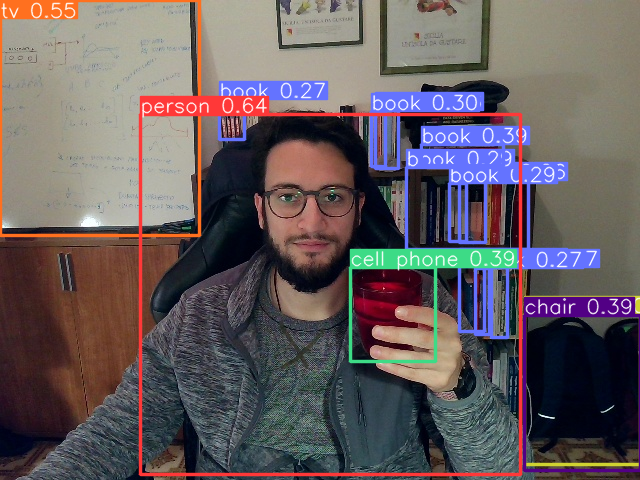

In [50]:
# Images
imgs = ['image.jpg']  # batch of images

# Inference
results = model(imgs)  # includes NMS

# Results
results.print()
results.show()#.save()  # or .show()

In [51]:
#results.names

In [52]:
#results.xyxy[0]  # img1 predictions (tensor)
df_res = results.pandas().xyxy[0]  # img1 predictions (pandas)
df_res

,xmin,ymin,xmax,ymax,confidence,class,name
0,140.598480,114.369080,520.102051,474.714111,0.640443,0,person
1,0.000000,0.000000,199.509781,235.493011,0.546884,62,tv
2,421.101868,144.821381,503.757141,165.656647,0.394827,73,book
3,524.223999,315.151123,640.000000,470.066772,0.388931,56,chair
4,350.088379,267.214813,435.634644,361.491425,0.387840,67,cell phone
5,524.384155,314.562531,640.000000,464.910248,0.303300,24,backpack
6,371.588593,111.297348,385.788666,166.378403,0.295680,73,book
7,406.155365,167.699875,528.040649,249.800003,0.294606,73,book
8,449.256744,183.745667,466.777985,241.676086,0.287597,73,book
9,219.811890,99.742409,244.224701,139.934387,0.272745,73,book


In [6]:
# Define the image path
image_path = 'image.jpg'
image = cv2.imread(image_path)
for row in range(len(df_res)):
    # Define the bounding box coordinates
    x_min = df_res['xmin'][row].astype(int)
    y_min = df_res['ymin'][row].astype(int)
    x_max = df_res['xmax'][row].astype(int)
    y_max = df_res['ymax'][row].astype(int)

    # Draw the bounding box
    if df_res['name'][row] == 'chair':
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        # Draw the class name and the confidence
        cv2.putText(image, df_res['name'][row], (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        cv2.putText(image, str(round(df_res['confidence'][row], 2)), (x_min, y_min - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

fig = px.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), title='YOLOv5', width=800, height=600)
# remove the x and y axis labels
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()